# Capstone Project: Random Forest Regression: SGCarMart Used Cars Price Predictor

In [1]:
import pandas as pd
import numpy as np
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
import patsy


## Section 1: DataFrame Loading, Cleaning

In [2]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(10)

,LISTING_URL,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
179,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru Forester 2.0i-L Sunroof,42800.0,13800.0,30-Mar-17,129000.0,2017,1208.0,Auto,22515.0,3/9/2024,14721.0,14721.0,53300.0,916.0,1995.0,1591.0,1.0,SUV
3777,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan Qashqai 1.2A DIG-T,23800.0,14930.0,27-Oct-15,113500.0,2015,508.0,Auto,13790.0,3/9/2024,18413.0,13413.0,56001.0,398.0,1197.0,1285.0,1.0,SUV
5391,https://www.sgcarmart.com/used_cars/info.php?I...,Porsche Cayman 2.7A,102888.0,27390.0,6-Jun-08,104000.0,2008,3027.0,Auto,14238.0,3/9/2024,67877.0,67877.0,37906.0,1367.0,2687.0,1390.0,6.0,Sports Car
1117,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz CLA-Class CLA200 Progressive,119800.0,19750.0,12-Sep-19,82000.0,2019,586.0,Auto,50969.0,3/9/2024,35114.0,41160.0,40001.0,1833.0,1332.0,1420.0,1.0,Luxury Sedan
1390,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan Qashqai 1.2A DIG-T Premium,35800.0,11260.0,31-Mar-17,103332.0,2016,508.0,Auto,21287.0,3/9/2024,18725.0,13725.0,50789.0,917.0,1197.0,1285.0,1.0,SUV
3464,https://www.sgcarmart.com/used_cars/info.php?I...,Audi A3 Sportback Mild Hybrid 1.5A TFSI S-tronic,126800.0,17680.0,1-Jun-21,22000.0,Hatchback,684.0,2021,53861.0,3/9/2024,NaN,NaN,63002.0,2438.0,1498.0,1395.0,1.0,NaN
6718,https://www.sgcarmart.com/used_cars/info.php?I...,Rolls-Royce Ghost Series II,668800.0,323420.0,13-Aug-15,14500.0,2015,8004.0,Auto,370331.0,3/9/2024,420967.0,729741.0,58109.0,39.0,6592.0,2450.0,2.0,Luxury Sedan
4217,https://www.sgcarmart.com/used_cars/info.php?I...,Porsche Panamera G2 3.0A PDK,272800.0,42930.0,15-Feb-19,95000.0,2018,2380.0,Auto,129482.0,3/9/2024,106309.0,163357.0,33989.0,1611.0,2995.0,1815.0,1.0,Sports Car
1570,https://www.sgcarmart.com/used_cars/info.php?I...,Hyundai Ioniq Hybrid 1.6A DCT,108800.0,14610.0,8-Sep-21,46000.0,2021,732.0,Auto,44282.0,3/9/2024,NaN,25443.0,49640.0,2559.0,1580.0,1361.0,NaN,Hatchback
2539,https://www.sgcarmart.com/used_cars/info.php?I...,Chevrolet Aveo5 1.4A,53000.0,9650.0,18-Mar-10,NaN,2009,939.0,Auto,18139.0,3/9/2024,10235.0,10235.0,33038.0,1980.0,1399.0,1135.0,3.0,Hatchback


In [3]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [4]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1) # Dropping columns that I used for my own reference

# We see that we have NA entries in this dataset. 
# We want to drop these NA values or they will pose problems for us later
# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6719 entries, 0 to 6718
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         6719 non-null   object 
 1   PRICE                         6670 non-null   float64
 2   DEPRE_YEARLY                  6561 non-null   float64
 3   REG_DATE                      6719 non-null   object 
 4   MILEAGE_KM                    5760 non-null   float64
 5   MANUFACTURED_YEAR             6719 non-null   object 
 6   ROAD_TAX_YEARLY               6640 non-null   float64
 7   TRANSMISSION                  6719 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  6254 non-null   float64
 9   OMV                           5637 non-null   float64
 10  ARF                           5648 non-null   float64
 11  COE_FROM_SCRAPE_DATE          6339 non-null   float64
 12  DAYS_OF_COE_LEFT              6696 non-null   float64
 13  ENGINE_C

In [5]:
# Taking a look at our data
df_clean.sample(10)

,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
6570,Toyota Vellfire 2.5A Z G-Edition Moonroof,95800.0,26920.0,17-Mar-17,92000.0,2016,1792.0,Auto,45944.0,45223.0,55313.0,50389.0,913.0,2493.0,2030.0,3.0,MPV
1664,Nissan Kicks e-POWER Hybrid 1.2A Premium Plus,100000.0,15280.0,1-Sep-20,47204.0,SUV,772.0,2020,33995.0,NaN,NaN,35710.0,1863.0,1198.0,1330.0,2.0,NaN
5792,Volkswagen Golf R 5DR Sunroof,146800.0,15080.0,29-May-14,80000.0,2014,1313.0,Auto,79293.0,40258.0,48362.0,99116.0,3530.0,1984.0,1420.0,2.0,Sports Car
5382,Mercedes-Benz CLA-Class CLA45 AMG 4MATIC,191800.0,20200.0,31-Mar-14,66000.0,2013,1322.0,Auto,90994.0,52597.0,66675.0,113742.0,3440.0,1991.0,1585.0,2.0,Sports Car
4869,Toyota Corolla Altis 1.6A Elegance,23800.0,12780.0,9-Oct-15,132000.0,2015,742.0,Auto,16845.0,19589.0,19589.0,55399.0,400.0,1598.0,1205.0,2.0,Mid-Sized Sedan
3457,Jaguar XE Diesel 2.0A Prestige,53888.0,13200.0,28-Jun-17,NaN,Luxury,1812.0,2017,34180.0,NaN,NaN,50110.0,1004.0,1999.0,1574.0,2.0,NaN
3622,Lexus UX Hybrid UX250h Luxury,147800.0,20590.0,20-Oct-20,54399.0,SUV,1198.0,2020,57379.0,NaN,NaN,40690.0,2226.0,1987.0,1570.0,1.0,NaN
1882,Mercedes-Benz GLC-Class GLC300 Mild Hybrid AMG...,181777.0,25310.0,5-Oct-20,NaN,SUV,1202.0,2020,92733.0,NaN,NaN,40989.0,2221.0,1991.0,1805.0,1.0,NaN
6680,BMW 6 Series 650i Coupe Sunroof,143800.0,14370.0,27-Jan-06,101000.0,2005,7800.0,Auto,NaN,97733.0,107507.0,NaN,0.0,4799.0,1715.0,3.0,Sports Car
117,Lexus SC430,44800.0,13470.0,3-Jan-08,115000.0,2007,6612.0,Auto,17245.0,62900.0,69190.0,51850.0,1193.0,4293.0,1775.0,2.0,Sports Car


In [6]:
# We now have rows of data after dropping null values

df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 1 to 6718
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         4316 non-null   object 
 1   PRICE                         4316 non-null   float64
 2   DEPRE_YEARLY                  4316 non-null   float64
 3   REG_DATE                      4316 non-null   object 
 4   MILEAGE_KM                    4316 non-null   float64
 5   MANUFACTURED_YEAR             4316 non-null   object 
 6   ROAD_TAX_YEARLY               4316 non-null   float64
 7   TRANSMISSION                  4316 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  4316 non-null   float64
 9   OMV                           4316 non-null   float64
 10  ARF                           4316 non-null   float64
 11  COE_FROM_SCRAPE_DATE          4316 non-null   float64
 12  DAYS_OF_COE_LEFT              4316 non-null   float64
 13  ENGINE_C

In [7]:
print(df_clean['VEHICLE_TYPE'].unique())

['SUV' 'Hatchback' 'MPV' 'Luxury Sedan' 'Mid-Sized Sedan' 'Sports Car'
 'Stationwagon' 'Others']


No KDE plot generated for vehicle type: SUV
No KDE plot generated for vehicle type: Hatchback
No KDE plot generated for vehicle type: MPV
No KDE plot generated for vehicle type: Luxury Sedan
No KDE plot generated for vehicle type: Mid-Sized Sedan
No KDE plot generated for vehicle type: Sports Car
No KDE plot generated for vehicle type: Stationwagon
No KDE plot generated for vehicle type: Others


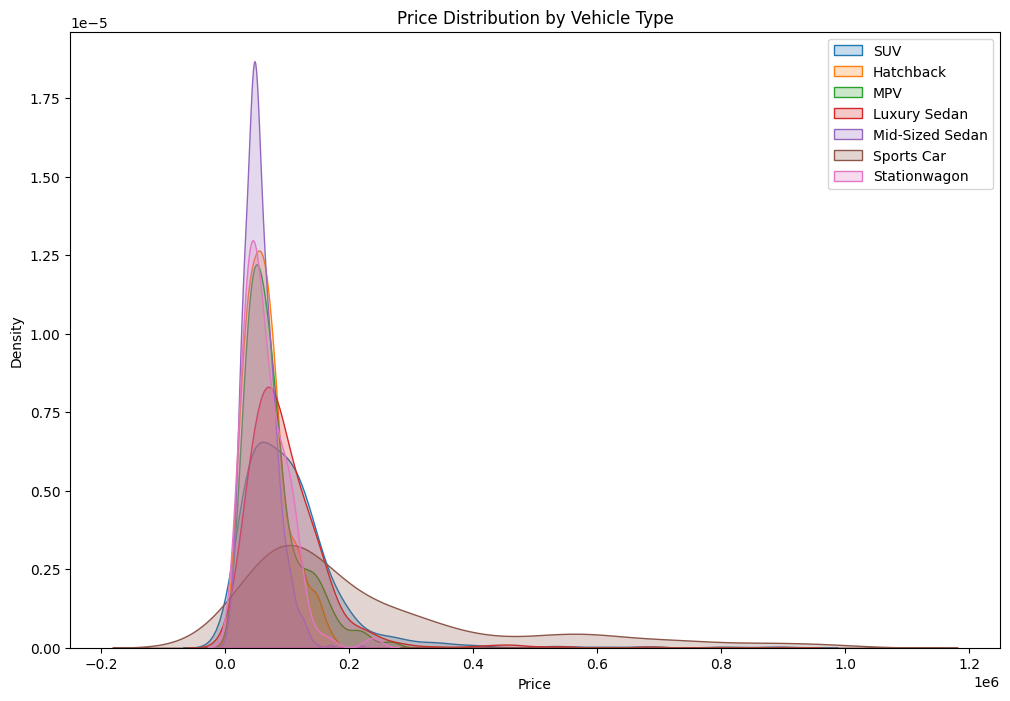

In [8]:
# Assuming your DataFrame is named 'cars'
unique_vehicle_types = df_clean['VEHICLE_TYPE'].unique()

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the KDE for each unique vehicle type
for vehicle_type in unique_vehicle_types:
    
    # Get the price data for the current vehicle type
    price_data = df_clean.loc[df_clean['VEHICLE_TYPE']==vehicle_type, 'PRICE']
    
    # Check if the price data has any variance
    if np.var(price_data) == 0:
        print(f"No KDE plot generated for vehicle type: {vehicle_type}")
        continue
    
    # Plot the KDE
    kde = sns.kdeplot(price_data, fill=True, label=vehicle_type, ax=ax)
    
    # Get the x and y values for the KDE
    lines = kde.get_lines()
    if lines:
        x, y = lines[0].get_data()
        
        # Add the actual price and density values to the plot
        for i, val in enumerate(price_data):
            ax.annotate(f"{val:.0f}", (x[i], y[i]), xytext=(5, 0), textcoords="offset points")
    else:
        print(f"No KDE plot generated for vehicle type: {vehicle_type}")

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Density')
ax.set_title('Price Distribution by Vehicle Type')
ax.legend()

plt.show()

In [9]:
# Get the count of data points for each vehicle type
vehicle_type_counts = df_clean['VEHICLE_TYPE'].value_counts()

# Print the counts
print(vehicle_type_counts)

VEHICLE_TYPE
SUV                1191
Luxury Sedan        875
Mid-Sized Sedan     674
Sports Car          547
Hatchback           503
MPV                 436
Stationwagon         89
Others                1
Name: count, dtype: int64


In [10]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_YEARLY', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


## Section 2: Data Categorizing

### Section 2.1: One-hot encoding TRANSMISSION Column

In [11]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      4276
Manual      40
Name: count, dtype: int64

In [12]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(10)

,BRAND,PRICE,DEPRE_YEARLY,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_YEARLY,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
6145,Kia Optima 2.0A,68800.0,10330.0,25-May-11,155000.0,2010,1694.0,31501.0,16769.0,16769.0,47316.0,2407.0,1998.0,1529.0,2.0,Luxury Sedan,1
3,Mercedes-Benz A-Class A200,53800.0,18370.0,3-Jan-17,88453.0,2016,740.0,26349.0,24971.0,21960.0,56500.0,820.0,1595.0,1395.0,1.0,Hatchback,1
4531,Hyundai Avante 1.6A GLS,73800.0,12090.0,26-Mar-20,53328.0,2019,738.0,27213.0,13151.0,13151.0,31210.0,2007.0,1591.0,1345.0,2.0,Mid-Sized Sedan,1
5699,Toyota Corolla Altis 1.6A Standard,132000.0,13890.0,16-Jun-23,22000.0,2022,742.0,93387.0,19981.0,19981.0,98001.0,3192.0,1598.0,1315.0,1.0,Mid-Sized Sedan,1
1017,Honda Stream 1.8A X,41000.0,10810.0,19-Jun-08,158000.0,2008,1467.0,14373.0,16344.0,16344.0,37906.0,1370.0,1799.0,1350.0,5.0,MPV,1
2947,Honda Mobilio 1.5A RS i-VTEC Luxe,38800.0,12990.0,8-Dec-16,95000.0,2016,684.0,22837.0,18867.0,18867.0,50951.0,824.0,1497.0,1160.0,1.0,MPV,1
600,Honda Fit 1.3A G F-Package,38800.0,12300.0,9-Jun-17,67000.0,2016,578.0,18295.0,14686.0,9686.0,45201.0,1005.0,1317.0,1020.0,1.0,Hatchback,1
6501,Honda Vezel 1.5A G,123800.0,15740.0,28-Mar-22,59000.0,2021,682.0,61236.0,23180.0,9452.0,71556.0,2739.0,1496.0,1250.0,1.0,SUV,1
3352,Mercedes-Benz C-Class C180 Avantgarde,87000.0,20520.0,3-Nov-17,117953.0,2017,740.0,44826.0,37239.0,44135.0,51000.0,1125.0,1595.0,1425.0,2.0,Luxury Sedan,1
2777,Porsche Cayenne S 2.9A Tip,368800.0,43790.0,19-Jan-21,45000.0,2020,2262.0,165801.0,114990.0,178982.0,49489.0,2315.0,2894.0,2095.0,1.0,SUV,1


In [13]:
   print(df_clean.dtypes)

BRAND                            object
PRICE                           float64
DEPRE_YEARLY                    float64
REG_DATE                         object
MILEAGE_KM                      float64
MANUFACTURED_YEAR                object
ROAD_TAX_YEARLY                 float64
DEREG_VALUE_FROM_SCRAPE_DATE    float64
OMV                             float64
ARF                             float64
COE_FROM_SCRAPE_DATE            float64
DAYS_OF_COE_LEFT                float64
ENGINE_CAPACITY_CC              float64
CURB_WEIGHT_KG                  float64
NO_OF_OWNERS                    float64
VEHICLE_TYPE                     object
TRANSMISSION                      int64
dtype: object


In [14]:
   df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].astype(str)

In [15]:
   # Identify the rows with string values
   string_rows = df_clean['VEHICLE_TYPE'].apply(lambda x: isinstance(x, str))
   
   # Apply the str.strip() operation to the string rows
   df_clean.loc[string_rows, 'VEHICLE_TYPE'] = df_clean.loc[string_rows, 'VEHICLE_TYPE'].apply(str.strip)
   
   # Concatenate the result back to the DataFrame
   df_clean = df_clean

In [16]:
# Performing whitespace stripping prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)

# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                1191
Luxury Sedan        875
Mid-Sized Sedan     674
Sports Car          547
Hatchback           503
MPV                 436
Stationwagon         89
Others                1
Name: count, dtype: int64

## Section 2.2: Datetime conversion

In [17]:
   print(df_clean['MANUFACTURED_YEAR'].unique())

['2019' '2016' '2017' '2010' '2018' '2015' '2022' '2011' '2020' '2008'
 '2009' '2021' '2003' '2014' '2007' '2023' '2005' '2012' '2013' '2006'
 '2024' '2004' '1966' '1960' '1980' '1976']


In [18]:
   df_clean = df_clean[df_clean['MANUFACTURED_YEAR'].str.isdigit()]
   df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)

In [19]:
   print(df_clean['MANUFACTURED_YEAR'].unique())

[2019 2016 2017 2010 2018 2015 2022 2011 2020 2008 2009 2021 2003 2014
 2007 2023 2005 2012 2013 2006 2024 2004 1966 1960 1980 1976]


## Section 2.2: Datetime conversion

In [20]:
# Converting reg_date to datetime, and Manufactured year to int

df_clean['REG_DATE'] = pd.to_datetime(df_clean['REG_DATE'], format='%d-%b-%y', dayfirst=True, errors='coerce')
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean[['REG_DATE','MANUFACTURED_YEAR']].dtypes


REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [21]:
df_main['SCRAPE_DATE']

0       3/9/2024
1       3/9/2024
2       3/9/2024
3       3/9/2024
4       3/9/2024
          ...   
6714    3/9/2024
6715    3/9/2024
6716    3/9/2024
6717    3/9/2024
6718    3/9/2024
Name: SCRAPE_DATE, Length: 6719, dtype: object

In [22]:
if df_main['SCRAPE_DATE'].dtype == object:
    df_main['SCRAPE_DATE'] = \
    pd.to_datetime(df_main['SCRAPE_DATE']).dt.year # Convert scrape date to integer to perform operations on them

In [23]:
df_main['SCRAPE_DATE']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
6714    2024
6715    2024
6716    2024
6717    2024
6718    2024
Name: SCRAPE_DATE, Length: 6719, dtype: int32

### Section 2.2.1: Adding a Car Age Column

In [24]:
# Obtaining number of years from year of manufacture to current year (metric for how new the car is)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'] - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

1        5
3        8
4        5
5        7
6       14
        ..
6709     7
6712     8
6714     9
6716     9
6718     9
Name: CAR_AGE, Length: 4316, dtype: int32

In [25]:
# Rearranging Columns 
df_clean = df_clean[['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_clean.head()

,BRAND,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
1,Honda HR-V 1.5A LX,78800.0,14790.0,94000.0,25501.0,1647.0,2019-03-21,2019,5.0,27800.0,22254.0,23156.0,1496.0,682.0,1200.0,1.0,SUV,1
3,Mercedes-Benz A-Class A200,53800.0,18370.0,88453.0,56500.0,820.0,2017-01-03,2016,8.0,26349.0,24971.0,21960.0,1595.0,740.0,1395.0,1.0,Hatchback,1
4,Toyota Previa 2.4A Aeras Moonroof,157800.0,22740.0,65000.0,41510.0,2199.0,2020-09-23,2019,5.0,55345.0,34487.0,40282.0,2362.0,1638.0,1775.0,1.0,MPV,1
5,Subaru Forester 2.0i-L Sunroof,45800.0,13700.0,106000.0,53001.0,1003.0,2017-06-27,2017,7.0,23659.0,14601.0,14601.0,1995.0,1208.0,1591.0,2.0,SUV,1
6,Audi A4 1.8A TFSI MU,17300.0,17440.0,160000.0,16457.0,38.0,2010-09-30,2010,14.0,3264.0,36125.0,36125.0,1798.0,1366.0,1450.0,2.0,Luxury Sedan,1


### Section 2.3: VEHICLE_TYPE To Dummy Variables

In [26]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy = patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.Others],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

,BRAND,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,...,VEHICLE_TYPE,TRANSMISSION,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.Others],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
1,Honda HR-V 1.5A LX,78800.0,14790.0,94000.0,25501.0,1647.0,2019-03-21,2019,5.0,27800.0,...,SUV,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Mercedes-Benz A-Class A200,53800.0,18370.0,88453.0,56500.0,820.0,2017-01-03,2016,8.0,26349.0,...,Hatchback,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Toyota Previa 2.4A Aeras Moonroof,157800.0,22740.0,65000.0,41510.0,2199.0,2020-09-23,2019,5.0,55345.0,...,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Subaru Forester 2.0i-L Sunroof,45800.0,13700.0,106000.0,53001.0,1003.0,2017-06-27,2017,7.0,23659.0,...,SUV,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Audi A4 1.8A TFSI MU,17300.0,17440.0,160000.0,16457.0,38.0,2010-09-30,2010,14.0,3264.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,Mercedes-Benz C-Class C200 AMG Line,91988.0,20870.0,121000.0,49996.0,1133.0,2017-11-01,2017,7.0,49676.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6712,Honda Jazz 1.5A RS,27000.0,13930.0,116350.0,51301.0,549.0,2016-03-18,2016,8.0,14063.0,...,Hatchback,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714,Toyota Alphard 3.5A SA C-Package Moonroof,116800.0,33570.0,83257.0,53001.0,910.0,2017-03-24,2015,9.0,50914.0,...,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6716,Volkswagen Passat 1.8A TFSI,46800.0,14760.0,75000.0,55501.0,791.0,2016-11-15,2015,9.0,29438.0,...,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Section 2.4: Car Brand Categorization. Includes:
* Splitting them into Dummy Variables
* Indexing them into price range categories (perhaps better metric over vehicle types)
* Converting lesser-known brands into "others"

In [28]:
# Renaming Brand Names to their actual names

df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

In [29]:
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)

# Checking the number of brands in the dataset
print("# Of rows in DataFrame in Brands Column:\n", df_clean2.loc[:,'BRAND'])
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

# Of rows in DataFrame in Brands Column:
 1                              Honda HR-V 1.5A LX
3                      Mercedes-Benz A-Class A200
4               Toyota Previa 2.4A Aeras Moonroof
5                  Subaru Forester 2.0i-L Sunroof
6                            Audi A4 1.8A TFSI MU
                          ...                    
6709          Mercedes-Benz C-Class C200 AMG Line
6712                           Honda Jazz 1.5A RS
6714    Toyota Alphard 3.5A SA C-Package Moonroof
6716                  Volkswagen Passat 1.8A TFSI
6718                  Rolls-Royce Ghost Series II
Name: BRAND, Length: 4316, dtype: object

Value Counts of Brands:
 BRAND
Honda Civic 1.6A VTi                                  56
Honda Vezel 1.5A X                                    52
Nissan Qashqai 1.2A DIG-T                             44
Toyota Corolla Altis 1.6A Elegance                    37
Toyota Vios 1.5A E                                    35
                                                  

## Section 3: Data Visualization
* EDA  
* Correlation Matrix  
* Pairplots  

### Section 3.1: Preliminary Correlation Exploration

Section 3.1.1: Analysis without Car Brands and Vehicle Types for Feature Dropping

In [30]:
df_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'ENGINE_CAPACITY_CC',
       'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE',
       'TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.Others]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

In [31]:
df_price_no_brands = df_clean2[['PRICE', 'DEPRE_YEARLY', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_YEARLY', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_price_no_brands.sample(10)

,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3611,35800.0,15700.0,117000.0,47889.0,611.0,2016-05-30,2016,8.0,17731.0,25098.0,17138.0,1395.0,624.0,1310.0,1.0,Luxury Sedan,1
5932,50888.0,13360.0,122000.0,41400.0,1216.0,2018-01-15,2017,7.0,21658.0,11891.0,11891.0,1591.0,738.0,1345.0,1.0,Mid-Sized Sedan,1
2966,109800.0,16580.0,73000.0,40790.0,2198.0,2020-09-22,2020,4.0,38885.0,18931.0,18931.0,1490.0,680.0,1563.0,1.0,SUV,1
4390,46800.0,15960.0,94000.0,57903.0,398.0,2016-08-17,2016,8.0,28528.0,28094.0,31332.0,2356.0,1630.0,1769.0,3.0,MPV,1
4908,159800.0,34590.0,93077.0,50010.0,887.0,2017-02-21,2014,10.0,100796.0,98352.0,149034.0,2979.0,2362.0,1875.0,2.0,Luxury Sedan,1
461,71800.0,16470.0,95000.0,40377.0,1251.0,2018-03-01,2017,7.0,32679.0,26138.0,28594.0,1498.0,684.0,1324.0,1.0,Mid-Sized Sedan,1
6697,35500.0,11980.0,134000.0,50972.0,768.0,2007-08-22,2007,17.0,15110.0,16732.0,18406.0,1794.0,1458.0,1300.0,2.0,MPV,1
3269,168000.0,29490.0,29700.0,31101.0,1615.0,2019-02-19,2018,6.0,64812.0,55977.0,72759.0,1991.0,1202.0,1785.0,2.0,SUV,1
2682,35800.0,11960.0,83154.0,51765.0,946.0,2017-04-10,2017,7.0,19130.0,14476.0,9476.0,1496.0,682.0,1310.0,1.0,Mid-Sized Sedan,1
1773,49888.0,17800.0,94000.0,56089.0,762.0,2016-10-26,2016,8.0,26123.0,26078.0,23510.0,1498.0,684.0,1324.0,1.0,Mid-Sized Sedan,1


In [32]:
# Corr Matrix
df_price_no_brands.loc[:, 'VEHICLE_TYPE'] = df_price_no_brands['VEHICLE_TYPE'].map({'SUV': 1, 'Hatchback': 2, 'Mid-Sized Sedan': 3, 'Luxury Sedan': 4, 'Sports Car': 5, 'MPV': 6, 'Stationwagon': 7})
df_price_no_brands.corr()

,PRICE,DEPRE_YEARLY,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_YEARLY,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
PRICE,1.000000,0.598982,-0.446287,0.344683,0.478349,0.271377,0.214191,-0.214191,0.644261,0.630746,0.680676,0.560515,0.496517,0.408985,-0.013533,0.107761,-0.068941
DEPRE_YEARLY,0.598982,1.000000,-0.325652,0.222362,0.142464,0.158247,0.128829,-0.128829,0.781301,0.834473,0.816711,0.657182,0.575745,0.447257,0.024489,0.127412,-0.054689
MILEAGE_KM,-0.446287,-0.325652,1.000000,-0.285616,-0.429866,-0.696421,-0.621115,0.621115,-0.448417,-0.244183,-0.270691,-0.101592,-0.035269,-0.046346,0.401312,0.101919,-0.014038
COE_FROM_SCRAPE_DATE,0.344683,0.222362,-0.285616,1.000000,0.340185,0.207775,0.201394,-0.201394,0.401884,0.263800,0.263693,0.243591,0.208671,0.218658,-0.062004,0.056396,-0.013542
DAYS_OF_COE_LEFT,0.478349,0.142464,-0.429866,0.340185,1.000000,0.280373,0.213154,-0.213154,0.384545,0.251859,0.232749,0.203253,0.225308,0.126363,-0.010811,0.007438,-0.053638
REG_DATE,0.271377,0.158247,-0.696421,0.207775,0.280373,1.000000,0.899575,-0.899575,0.366899,-0.026399,0.043970,-0.175929,-0.307968,-0.021816,-0.584225,-0.210768,0.056628
MANUFACTURED_YEAR,0.214191,0.128829,-0.621115,0.201394,0.213154,0.899575,1.000000,-1.000000,0.334441,-0.025510,0.037270,-0.201793,-0.284349,-0.031815,-0.532983,-0.214882,0.089113
CAR_AGE,-0.214191,-0.128829,0.621115,-0.201394,-0.213154,-0.899575,-1.000000,1.000000,-0.334441,0.025510,-0.037270,0.201793,0.284349,0.031815,0.532983,0.214882,-0.089113
DEREG_VALUE_FROM_SCRAPE_DATE,0.644261,0.781301,-0.448417,0.401884,0.384545,0.366899,0.334441,-0.334441,1.000000,0.669625,0.742194,0.512524,0.400871,0.411764,-0.096185,0.081293,-0.024418
OMV,0.630746,0.834473,-0.244183,0.263800,0.251859,-0.026399,-0.025510,0.025510,0.669625,1.000000,0.891529,0.826324,0.812231,0.542532,0.171696,0.186592,-0.014329


In [33]:
# How each feature relates to price
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
ARF                             0.680676
DEREG_VALUE_FROM_SCRAPE_DATE    0.644261
OMV                             0.630746
DEPRE_YEARLY                    0.598982
ENGINE_CAPACITY_CC              0.560515
ROAD_TAX_YEARLY                 0.496517
DAYS_OF_COE_LEFT                0.478349
CURB_WEIGHT_KG                  0.408985
COE_FROM_SCRAPE_DATE            0.344683
REG_DATE                        0.271377
MANUFACTURED_YEAR               0.214191
VEHICLE_TYPE                    0.107761
NO_OF_OWNERS                   -0.013533
TRANSMISSION                   -0.068941
CAR_AGE                        -0.214191
MILEAGE_KM                     -0.446287
Name: PRICE, dtype: float64

(17.5, -0.5)

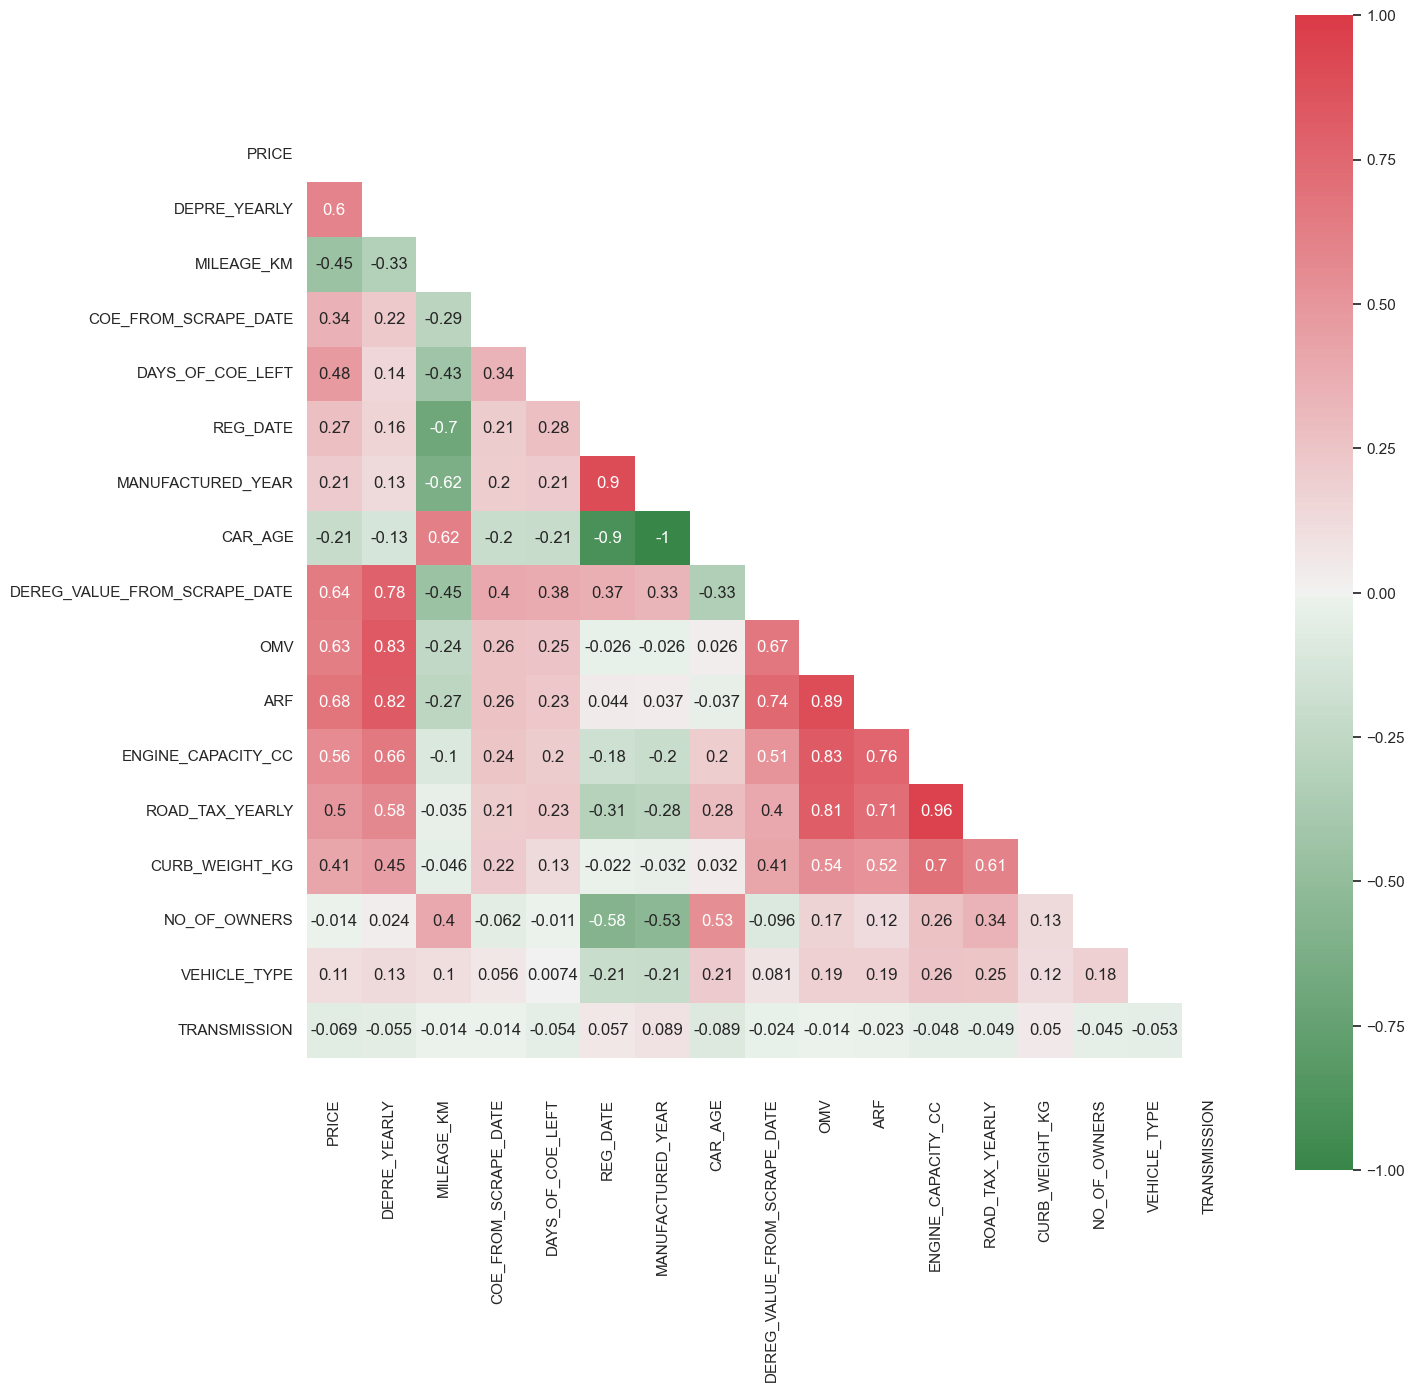

In [34]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_price_no_brands.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_price_no_brands.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [35]:
sns.heatmap(data=df_clean.corr(), cmap=coolwarm, sqaure=True)

ValueError: could not convert string to float: 'Honda HR-V 1.5A LX'